In [1]:
import matplotlib.pyplot as plot
import matplotlib.dates as dates
import pydata_google_auth
import pandas as pd
from google.cloud import bigquery
import projectIDContainer

credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
project_id = projectIDContainer.project_id
# hardcoding the pie chart keys and manually setting the colours to be consistent is really not the way I'd like to handle this
# TODO: remove the ascending sort from the pie charts; also see what that does to the colour order
threeColorsArray = ['#FFC6FF', '#CAFFBF', '#FFD6A5'] # tablet, desktop, mobile
threeColorsArray1 = ['#FFC6FF', '#FFD6A5', '#CAFFBF'] # tablet, mobile, desktop
threeColorsArray2 = ['#FFD6A5', '#CAFFBF', '#FFC6FF'] # mobile, desktop, tablet
rainbowArray = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
singleColorArray = ["#BDB2FF"]

def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query


  deviceCategory  totalSessions
0         tablet        1931531
1        desktop        6572847
2         mobile        7935801


<AxesSubplot:ylabel='totalSessions'>

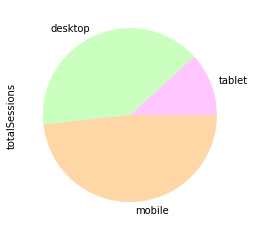

In [2]:
totalSessionsPerDeviceCategory = """
    SELECT deviceCategory, SUM(sessions) AS totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY totalSessions ASC
"""
runQuery(totalSessionsPerDeviceCategory).plot.pie(x='deviceCategory', y='totalSessions', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])


     channelGrouping  totalSessions
0         Newsletter         106582
1            Display         122714
2            (Other)         154333
3        Retargeting         209782
4       Email alerts         298831
5        Aggregators         537797
6        Paid Search         673125
7             Social         677312
8   Partner referral         702044
9              Email         891855
10          Referral        2564612
11            Direct        2854506
12    Organic Search        6646686


<AxesSubplot:xlabel='channelGrouping'>

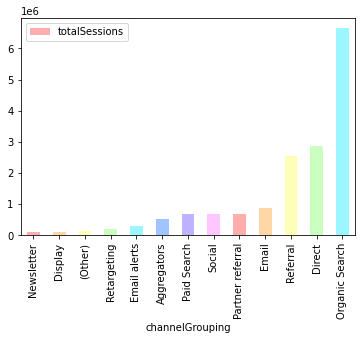

In [3]:
totalSessionsPerChannelGrouping = """
    SELECT channelGrouping, SUM(sessions) AS totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY totalSessions ASC
"""
runQuery(totalSessionsPerChannelGrouping).plot.bar(x='channelGrouping', y='totalSessions', color=rainbowArray)
